In [1]:
# pip install seaborn

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

import seaborn as sns
from sklearn import datasets
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay,classification_report, log_loss

In [3]:
###----------------
### Some parameters
###----------------

RANDOM_STATE = 24 # REMEMBER: to remove at the time of promotion to production
np.random.seed(RANDOM_STATE)
rng = np.random.default_rng(seed = RANDOM_STATE) # Set Random Seed for reproducible  results

NOISE = 0.2
EPOCHS = 4000 # number of epochs
ALPHA = 0.1  # learning rate
N_SAMPLES = 1000
TEST_SIZE=0.2

# parameters for Matplotlib
params = {'legend.fontsize': 'medium',
          'figure.figsize': (15, 8),
          'axes.labelsize': 'large',
          'axes.titlesize':'large',
          'xtick.labelsize':'large',
          'ytick.labelsize':'large'
         }

plt.rcParams.update(params)

CMAP = plt.cm.coolwarm
plt.style.use('seaborn-v0_8-darkgrid') # plt.style.use('ggplot')

In [4]:
X, y = datasets.make_moons(n_samples=N_SAMPLES, 
                           shuffle=True, 
                           noise=NOISE, 
                           random_state=RANDOM_STATE)
X[:5], y[:5]

(array([[ 0.90633951,  0.90267624],
        [-1.11536828,  0.75579289],
        [ 1.88769158,  0.4175967 ],
        [-0.93345034, -0.02299851],
        [-0.96872877,  0.06396285]]),
 array([0, 0, 1, 0, 0]))

## Visualization
<p style="font-family: Arial; font-size:1.2em">
DataFrames are easier to visualize
</p>

In [5]:
data_df = pd.DataFrame(X, columns = ['A', 'B'])

data_df['target'] = y

data_df.head()

,A,B,target
0,0.906340,0.902676,0
1,-1.115368,0.755793,0
2,1.887692,0.417597,1
3,-0.933450,-0.022999,0
4,-0.968729,0.063963,0


In [6]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       1000 non-null   float64
 1   B       1000 non-null   float64
 2   target  1000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 23.6 KB


In [7]:
data_df.describe() # Generate descriptive statistic

,A,B,target
count,1000.000000,1000.000000,1000.00000
mean,0.490841,0.239025,0.50000
std,0.898951,0.540082,0.50025
min,-1.688795,-0.955280,0.00000
25%,-0.149565,-0.205090,0.00000
50%,0.500100,0.241163,0.50000
75%,1.095048,0.680394,1.00000
max,2.419113,1.612075,1.00000


In [8]:
# what labels are present?
data_df.target.unique()

array([0, 1])

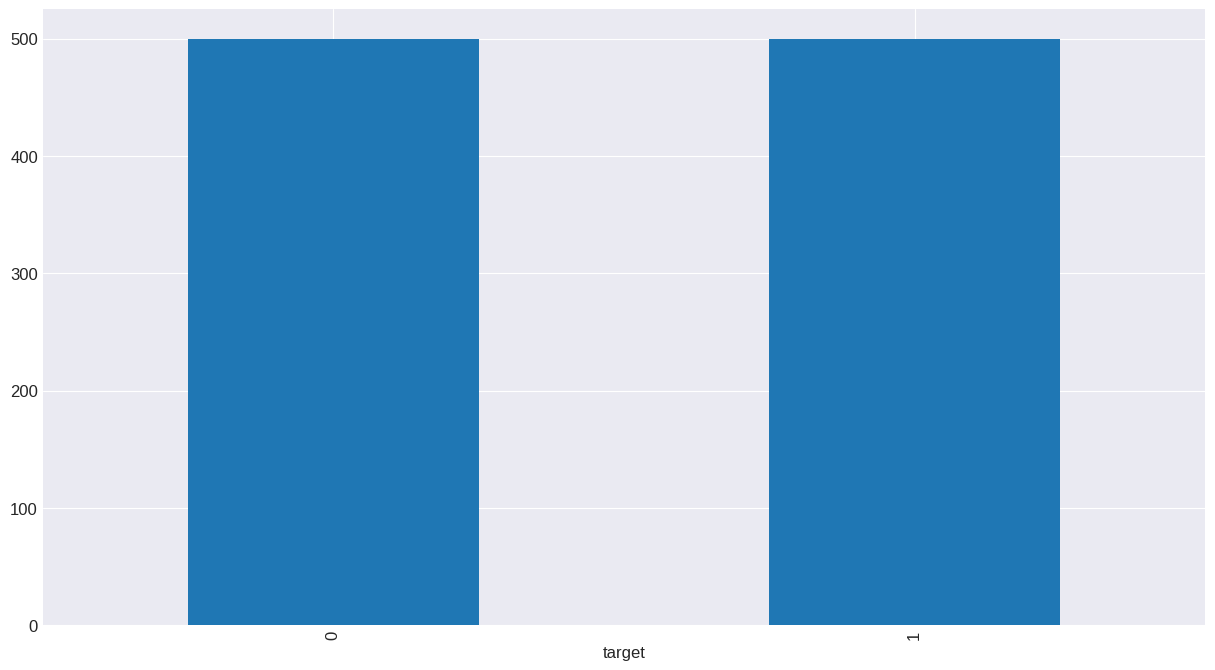

In [9]:
fig, ax = plt.subplots() # Instantiate
    
data_df['target'].value_counts().plot(ax=ax, kind='bar');

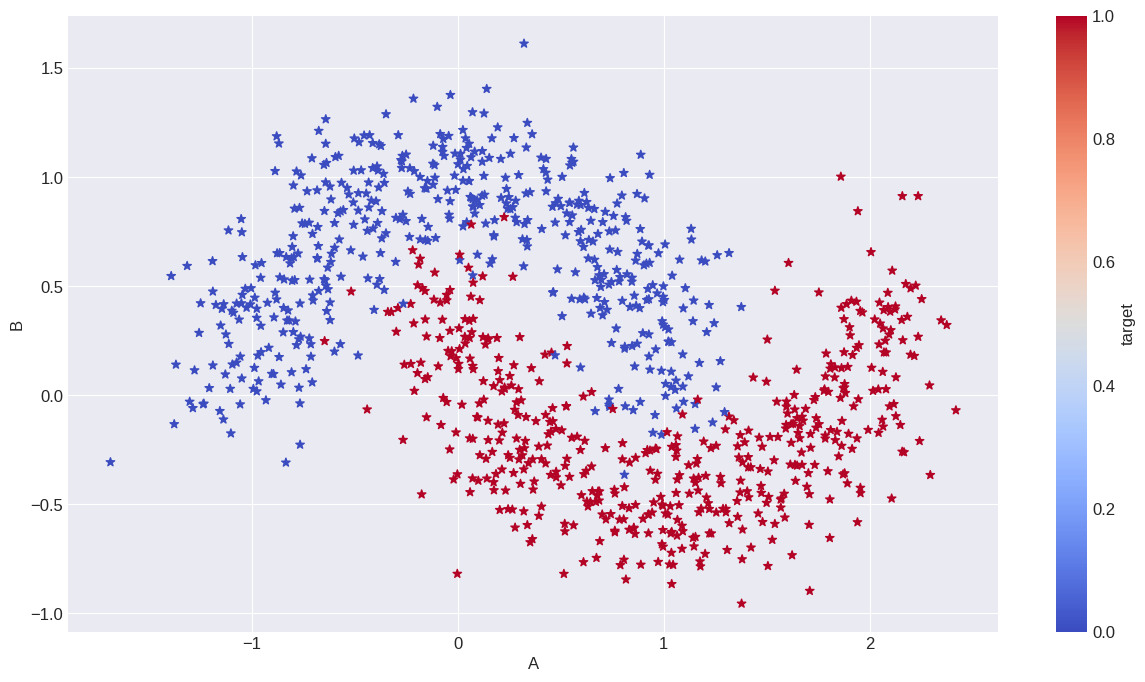

In [10]:
# Plot the data
data_df.plot.scatter('A', 'B',      # columns to plot
                     s = 40,        # size of the marker
                     marker = '*',  # type of marker
                     c = 'target',  # color as per target column
                     cmap=CMAP);    # using colormap

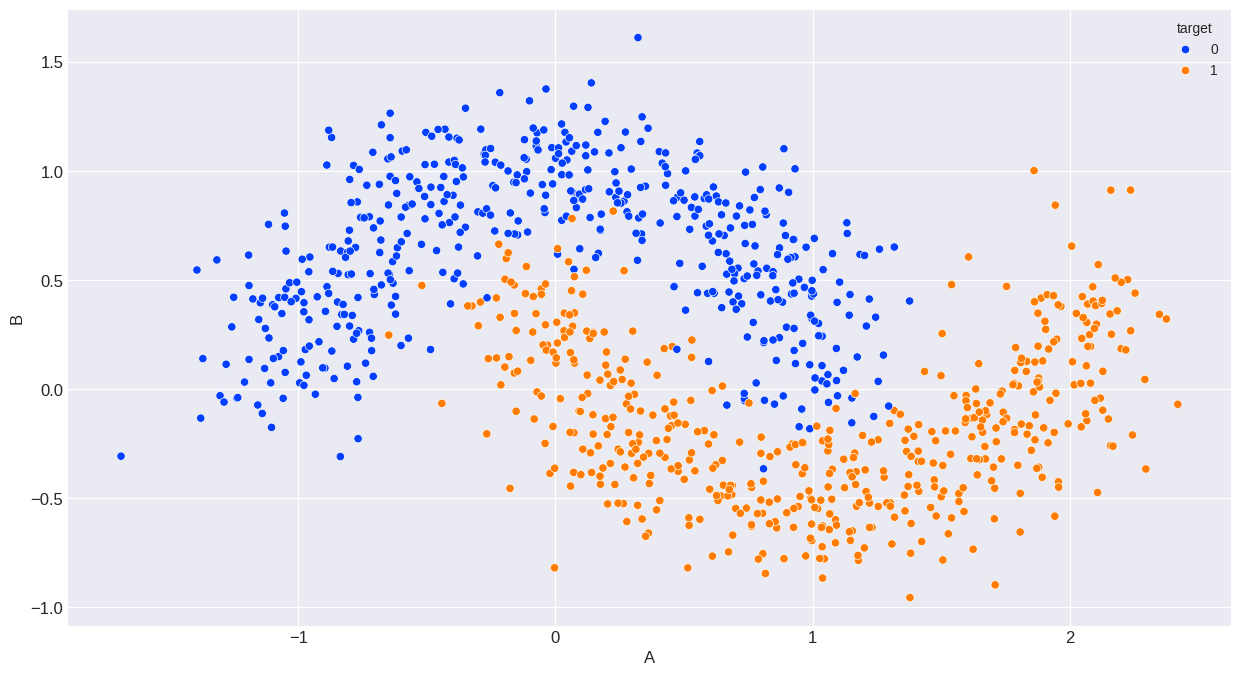

In [11]:
# Using Seaborn
ax = sns.scatterplot(data=data_df, # data from dataframe
                     x='A', y='B',  # X axis and y axis columns
                     palette=sns.color_palette("bright", 2), # color map
                     hue='target'); # Color as per target column

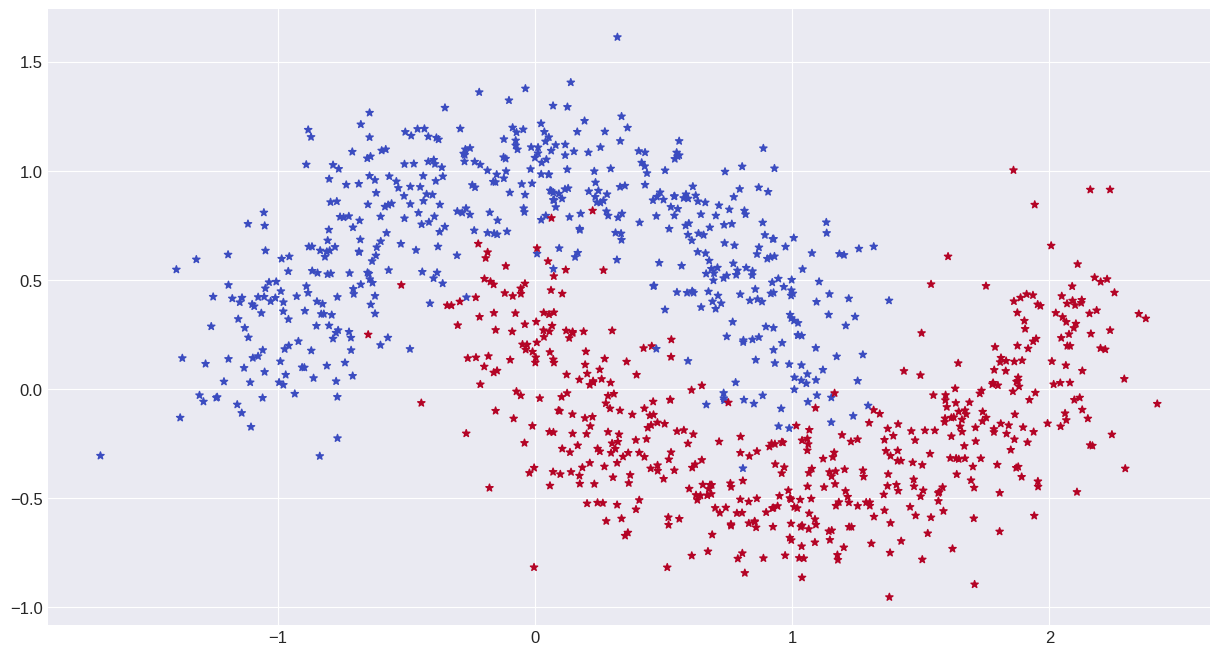

In [12]:
#### In case you want to plot X Array directly
plt.scatter(X[:,0], X[:,1], s=30, c=y, marker = '*', cmap=CMAP);

In [13]:
y = pd.get_dummies(y).to_numpy()
y

array([[ True, False],
       [ True, False],
       [False,  True],
       ...,
       [ True, False],
       [False,  True],
       [ True, False]])

In [14]:
y.shape

(1000, 2)

In [15]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=TEST_SIZE,random_state=RANDOM_STATE,stratify=y)

In [16]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((800, 2), (200, 2), (800, 2), (200, 2))

In [17]:
# type(data_train)

In [18]:
# data_train[0]

In [19]:
# weights = rng.random(data_train.shape[1])
# # w0,w1,w2
# # Z = x*w+b
# # Z= weights[0]
# weights

In [20]:
# Softmax function
def fn_softmax(z):
    exp_z = np.exp(z)
    return exp_z/np.sum(exp_z,axis=1,keepdims=True)

In [21]:
sm = fn_softmax(np.asarray([[8,5,0],[-10,0,10]]))
#sm.shape
sm.sum(axis=1).shape

(2,)

In [22]:
def fn_activ(z):
    return np.tanh(z)
def fn_activ_prime(a):
    return 1-np.tanh(a)**2

In [23]:
def predict(model,X_p):
    W1,b1,W2,b2 = model['W1'],model['b1'],model['W2'],model['b2']
    W3,b3,W4,b4,W5,b5 = model['W3'],model['b3'],model['W4'],model['b4'],model['W5'],model['b5']

    ### Layer 1 
        
    z1 = X_p.dot(W1)+b1  # Aggregation   z = X.W +b
    a1 = fn_activ(z1)     # Activation  a=g(z)

    ### Layer 2 
        
    z2=a1.dot(W2)+b2    # Aggregation  z = X.W +b
    a2=fn_activ(z2)   # Activation  a=g(z)

    ### Layer 3 
        
    z3=a2.dot(W3)+b3    # Aggregation  z = X.W +b
    a3=fn_activ(z3)   # Activation  a=g(z)

    ### Layer 4 
        
    z4=a3.dot(W4)+b4    # Aggregation  z = X.W +b
    a4=fn_activ(z4)   # Activation  a=g(z)

    ### Layer 5 (Output Layer) 
        
    z5=a4.dot(W5)+b5    # Aggregation  z = X.W +b
    a5=fn_softmax(z5)   # Activation  a=g(z)

    return np.argmax(a5,axis=1) #Pick index of class with highest probability
    

In [24]:
def calculate_loss(model,X_l,y_l):
    W1,b1,W2,b2 = model['W1'],model['b1'],model['W2'],model['b2']
    W3,b3,W4,b4,W5, b5 = model['W3'],model['b3'],model['W4'],model['b4'],model['W5'],model['b5']
    m=X_l.shape[0]
    
    ### Forward Propogation
    ### Layer 1 
        
    z1 = X_l.dot(W1)+b1  # Aggregation   z = X.W +b
    a1 = fn_activ(z1)     # Activation  a=g(z)

    ### Layer 2 
        
    z2=a1.dot(W2)+b2    # Aggregation  z = X.W +b
    a2=fn_activ(z2)   # Activation  a=g(z)

    ### Layer 3 
        
    z3=a2.dot(W3)+b3    # Aggregation  z = X.W +b
    a3=fn_activ(z3)   # Activation  a=g(z)

    ### Layer 4 
        
    z4=a3.dot(W4)+b4    # Aggregation  z = X.W +b
    a4=fn_activ(z4)   # Activation  a=g(z)

    ### Layer 5 (Output Layer) 
        
    z5=a4.dot(W5)+b5    # Aggregation  z = X.W +b
    a5=fn_softmax(z5)   # Activation  a=g(z)

    data_loss = -((y_l)*np.log(a5)+(1-y_l)*np.log(1-a5)).sum() # Binary

    return data_loss / m

In [25]:
# wgts  = np.array([0.1,2.0,1.0])
# predict(data_train[0],wgts)

In [26]:
loss_hist = {}

#  Multiple layers
- Input Layer
- Layer 1 - 5 - Tanh
- Layer 2 - 5 - Tanh
- Layer 3 - 4 - Tanh
- Layer 4 - 3 - Tanh
- Output Layer

In [27]:
# Model parameters to build the models
param = {}
param['nn_hdim'] = [X_train.shape[1], 5, 5, 4, 3] #Node Nums

l_param = {}
l_param['nn_hdim'] = [X_train.shape[1], 5, 5, 4, 3] #Node Nums

loss_hist = {}

In [28]:
def build_model(param, X_tr, y_tr, nn_out, alpha=ALPHA, epochs=EPOCHS):
    m = X_tr.shape[0]
    nn_output_dim = nn_out

    '''
    Args: 
        X_tr : Training Features
        y_tr : Training labels
        nn_hdim : Number of Nodes in the Hidden Layer
        nn_out : Size of Output 
    '''

    #### Layer 1 - Input layer

    #matrix size = 2,5
    W1 = np.random.randn(param['nn_hdim'][0],
                         param['nn_hdim'][1]) / np.sqrt(param['nn_hdim'][0])
    # https://search.brave.com/search?q=W1+%3D+np.random.randn%28param%5B%27nn_hdim%27%5D%5B0%5D%2Cparam%5B%27nn_hdim%27%5D%5B1%5D%29%2Fnp.sqrt%28param%5B%27nn_hdim%27%5D%5B0%5D%29++++++meaning+of+this+code&source=web

    #matrix size = 5
    b1 = np.zeros((1,param['nn_hdim'][1]),dtype=np.float32)
    # https://search.brave.com/search?q=++++b1+%3D+np.zeros%28%281%2Cparam%5B%27nn_hdim%27%5D%5B1%5D%29%2Cdtype%3Dnp.float32%29+meaning+of+this+code&source=web


    #### Layer 2

    #matrix size =5,5
    W2 = np.random.randn(param['nn_hdim'][1],
                         param['nn_hdim'][2]) / np.sqrt(param['nn_hdim'][1])

    #matrix size = 5
    b2 = np.zeros((1,param['nn_hdim'][2]),dtype=np.float32)


    #### Layer 3

    #matrix size =5,4
    W3 = np.random.randn(param['nn_hdim'][2],
                         param['nn_hdim'][3])/np.sqrt(param['nn_hdim'][2])

    #matrix size = 5
    b3 = np.zeros((1,param['nn_hdim'][3]),dtype=np.float32)


    #### Layer 4

    #matrix size =4,3
    W4 = np.random.randn(param['nn_hdim'][3],
                         param['nn_hdim'][4])/np.sqrt(param['nn_hdim'][3])

    #matrix size = 5
    b4 = np.zeros((1,param['nn_hdim'][4]),dtype=np.float32)


    #### Layer 5 - Output layer

    #matrix size =4,2
    W5 = np.random.randn(param['nn_hdim'][4],
                         nn_output_dim)/np.sqrt(param['nn_hdim'][4])

    #matrix size = 2
    b5 = np.zeros((1,nn_output_dim),dtype=np.float32)
    
    curr_loss=0
    loss,epoch=[],[]
    
    for i in range(0,epochs):

        ######################## Forward Propogation ###################

        ### Layer 1 (Input Layer) 
        
        z1 = X_tr.dot(W1)+b1  # Aggregation   z = X.W +b
        a1 = fn_activ(z1)     # Activation  a=g(z)

        ### Layer 2 
        
        z2=a1.dot(W2)+b2    # Aggregation  z = X.W +b
        a2=fn_activ(z2)   # Activation  a=g(z)

        ### Layer 3 
        
        z3=a2.dot(W3)+b3    # Aggregation  z = X.W +b
        a3=fn_activ(z3)   # Activation  a=g(z)

        ### Layer 4 
        
        z4=a3.dot(W4)+b4    # Aggregation  z = X.W +b
        a4=fn_activ(z4)   # Activation  a=g(z)

        ### Layer 5 (Output Layer) 
        
        z5=a4.dot(W5)+b5    # Aggregation  z = X.W +b
        a5=fn_softmax(z5)   # Activation  a=g(z)
 

        ####################### Back Propogation #######################

        ########################### Layer 5 ############################

        assert(a5.shape == y_tr.shape), f'check y {a5.shape}/{y_tr.shape}'
        dz5 = a5 - y_tr # REMEMBER dim of a5 and y to be same

        dW5 = (a4.T).dot(dz5)
        assert(W5.shape == dW5.shape), f'check W5 {W5.shape}/{dW5.shape}'

        db5 = np.sum(dz5, axis=0,keepdims=True)
        assert(b5.shape == db5.shape), f'check b5 {b5.shape}/{db5.shape}'

        da4 = dz5.dot(W5.T)
        assert(a4.shape == da4.shape), f'check a4 {a4.shape}/{da4.shape}'

        ########################### Layer 4 ############################


        dz4 = da4 * fn_activ_prime(z4)
        assert(z4.shape == dz4.shape), f'check z4 {z4.shape}/{dz4.shape}'

        dW4  = (a3.T).dot(dz4)
        assert(W4.shape == dW4.shape), f'check W4 {W4.shape}/{dW4.shape}'

        db4 = np.sum(dz4,axis=0,keepdims=True)
        assert(b4.shape == db4.shape), f'check b4 {b4.shape}/{db4.shape}'

        da3 = dz4.dot(W4.T)
        assert(a3.shape == da3.shape), f'check a2 {a3.shape}/{da3.shape}'

        ########################### Layer 3 ############################


        dz3 = da3 * fn_activ_prime(z3)
        assert(z3.shape == dz3.shape), f'check z3 {z3.shape}/{dz3.shape}'

        dW3  = (a2.T).dot(dz3)
        assert(W3.shape == dW3.shape), f'check W3 {W3.shape}/{dW3.shape}'

        db3 = np.sum(dz3,axis=0,keepdims=True)
        assert(b3.shape == db3.shape), f'check b3 {b3.shape}/{db3.shape}'

        da2 = dz3.dot(W3.T)
        assert(a2.shape == da2.shape), f'check a2 {a2.shape}/{da2.shape}'

        ########################### Layer 2 ############################


        dz2 = da2 * fn_activ_prime(z2)
        assert(z2.shape == dz2.shape), f'check z2 {z2.shape}/{dz2.shape}'

        dW2  = (a1.T).dot(dz2)
        assert(W2.shape == dW2.shape), f'check W2 {W2.shape}/{dW2.shape}'

        db2 = np.sum(dz2,axis=0,keepdims=True)
        assert(b2.shape == db2.shape), f'check b2 {b2.shape}/{db2.shape}'

        da1 = dz2.dot(W2.T)
        assert(a1.shape == da1.shape), f'check a1 {a1.shape}/{da1.shape}'

        ########################### Layer 1 #############################
    

        dz1 = da1 * fn_activ_prime(z1)
        assert(z1.shape == dz1.shape), f'check b2 {z1.shape}/{dz1.shape}'

        dW1  = (X_tr.T).dot(dz1)
        assert(W1.shape == dW1.shape), f'check W2 {W1.shape}/{dW1.shape}'

        db1 = np.sum(dz1,axis=0,keepdims=True)
        assert(b1.shape == db1.shape), f'check b2 {b1.shape}/{db1.shape}'

        ### Gradient Update
        W1 += -alpha*dW1/m
        b1 += -alpha*db1/m

        W2 += -alpha*dW2/m
        b2 += -alpha*db2/m
        
        W3 += -alpha*dW3/m
        b3 += -alpha*db3/m
        
        W4 += -alpha*dW4/m
        b4 += -alpha*db4/m
        
        W5 += -alpha*dW5/m
        b5 += -alpha*db5/m

        model = {'W1':W1,'b1':b1,
                 'W2': W2, 'b2': b2,
                 'W3': W3, 'b3': b3,
                 'W4': W4, 'b4': b4,
                 'W5': W5, 'b5': b5}
        
        curr_loss = calculate_loss(model,X_tr,y_tr)
        loss.append(curr_loss)
        epoch.append(i)

        if i%1000 == 0:
            print(f'After epoch : {i:3d}; loss : {curr_loss:.5f}')

    loss_hist['epoch']=epoch
    loss_hist['loss']=loss

    return model

In [29]:
nn_output_dim=2
model = build_model(param,X_train,y_train,nn_output_dim)

After epoch :   0; loss : 1.23770
After epoch : 1000; loss : 0.15649
After epoch : 2000; loss : 0.14431
After epoch : 3000; loss : 0.13784


In [30]:
model

{'W1': array([[ 1.54244142, -0.82808988, -0.74363595, -1.64452055, -0.80269272],
        [-1.22779521,  0.14212407,  0.15799036, -1.41777319,  0.17750398]]),
 'b1': array([[ 0.04105966,  0.6418412 ,  0.5261482 ,  1.0969265 , -0.13804734]],
       dtype=float32),
 'W2': array([[ 0.429145  ,  1.05345025, -0.28987458,  0.03262209, -0.07383194],
        [ 0.19140117,  1.16259572,  0.92338085, -0.24423985,  0.1385141 ],
        [-0.80351212,  0.76276265,  1.01183338, -0.37546227, -0.00859481],
        [ 0.67648522, -0.38113557,  0.5568517 ,  0.7128586 ,  0.29828848],
        [-0.40884203,  0.60415501,  1.1294973 , -0.90311027,  0.70308633]]),
 'b2': array([[-0.00903455,  0.22149186,  0.26681587, -0.07727864, -0.42282668]],
       dtype=float32),
 'W3': array([[-9.88890898e-01, -3.83834769e-02,  5.96694342e-01,
          2.54514378e-01],
        [ 1.27059489e-01,  6.33109441e-01, -1.17921178e-01,
         -1.42874799e+00],
        [ 1.28230912e-01,  5.80190283e-01,  3.99880924e-01,
         

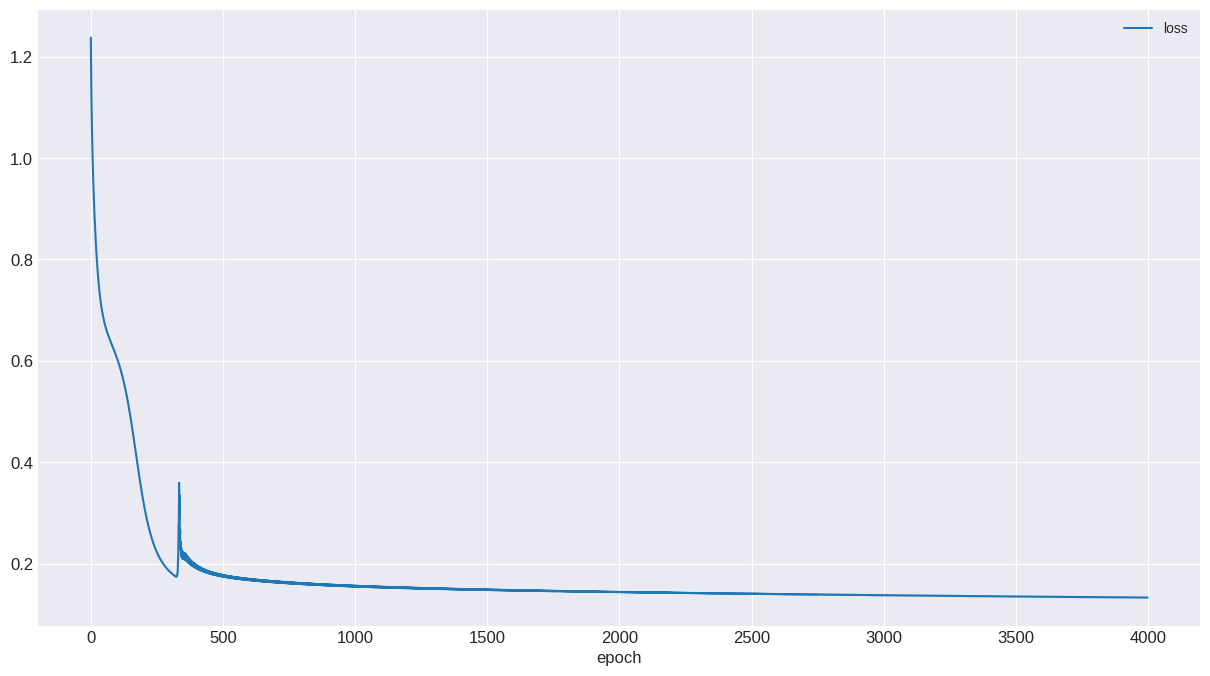

In [31]:
pd.DataFrame(loss_hist).plot(x='epoch');

In [32]:
y_pred = predict(model,X_train)
accuracy_score(y_train.argmax(axis=1),y_pred)

0.97375

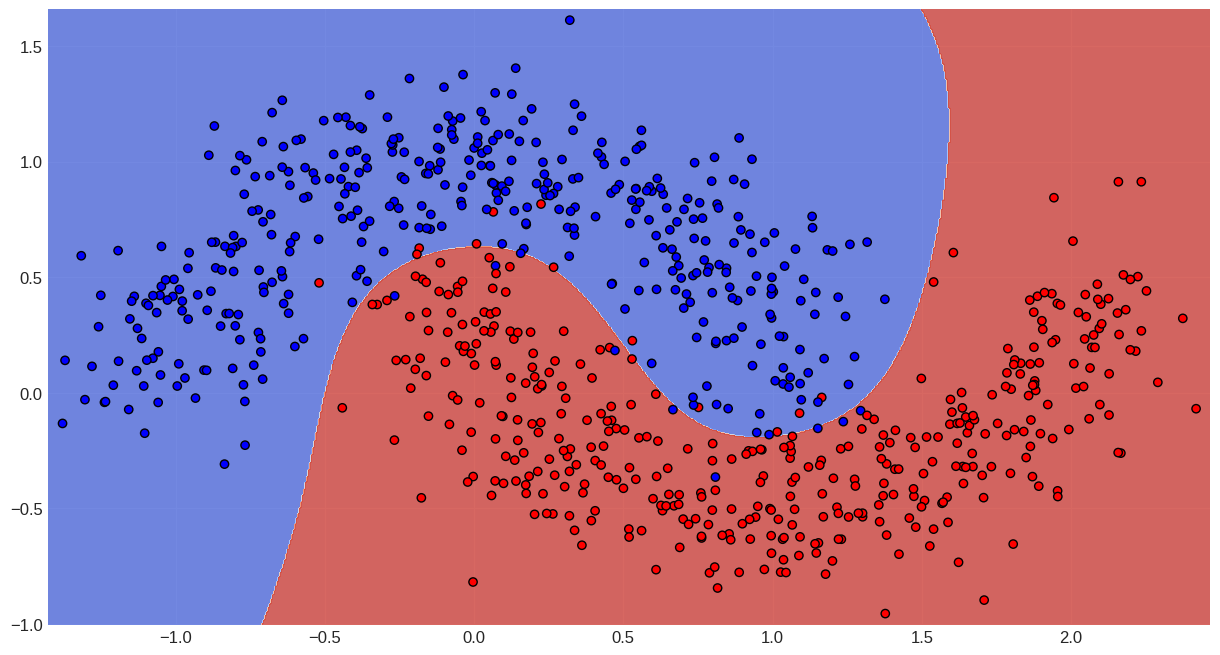

In [33]:
X = X_train
fig,ax = plt.subplots()

dm = 0.005
x_min,x_max = X[:,0].min()-0.05,X[:,0].max()+0.05
y_min,y_max = X[:,1].min()-0.05,X[:,1].max()+0.05

xx,yy = np.meshgrid(np.arange(x_min,x_max,dm),
                    np.arange(y_min,y_max,dm))

XX = np.c_[xx.ravel(),yy.ravel()]
y_pred = predict(model,XX)


y_pred = predict(model,XX)
Z = np.array(y_pred).reshape(xx.shape)
ax.contourf(xx,yy,Z,cmap = CMAP,alpha=0.8)
ax.scatter(X[:,0],X[:,1],c=y_train.argmax(axis=1),edgecolors='k',cmap=plt.cm.bwr)

# Test Data

In [34]:
y_pred = predict(model,X_test)
accuracy_score(y_test.argmax(axis=1),y_pred)

0.98

In [35]:
cm = confusion_matrix(y_test.argmax(axis=1),y_pred)
cm

array([[99,  1],
       [ 3, 97]])

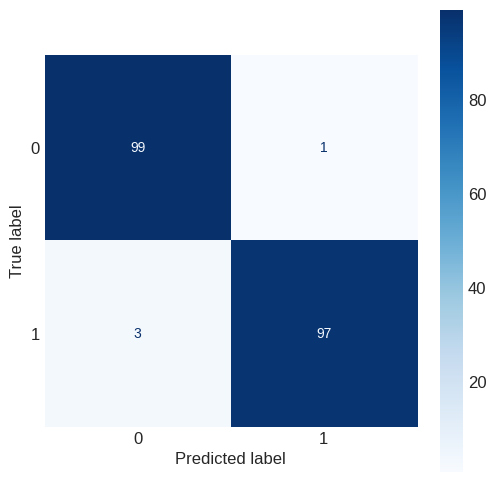

In [36]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=[0,1])
fig,ax = plt.subplots(figsize=(6,6))
disp.plot(ax=ax,cmap=plt.cm.Blues)
ax.grid(False)